In [ ]:
#@title The MIT License (MIT)
#
# Copyright (c) 2025 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

# Estudo de Caso: Segmentação de Clientes para Marketing com K-means

Neste estudo de caso, vou usar o algoritmo **K-means** para segmentar clientes de uma empresa de varejo e ajudá-la a direcionar melhor suas campanhas de marketing. O conjunto de dados contém informações sobre idade, renda anual e pontuação de gastos dos clientes. Com isso, aplicarei o K-means para identificar grupos de clientes com comportamentos semelhantes.

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ericshantos/ML-exercise/blob/main/clustering/client_marketing/clustering_client_marketing.ipynb
"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Rode no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ericshantos/ML-exercise/blob/main/clustering/client_marketing/clustering_client_marketing.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visualize o código no GitHub</a>
  </td>
</table>

## Carregando os dados

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
file_path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python", "Mall_Customers.csv")

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análise exploratória e dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print("Quantidade de valores nulos: ", df.isnull().sum().sum())
print("Quantidade de valores duplicados: ", df.duplicated().sum())

Quantidade de valores nulos:  0
Quantidade de valores duplicados:  0


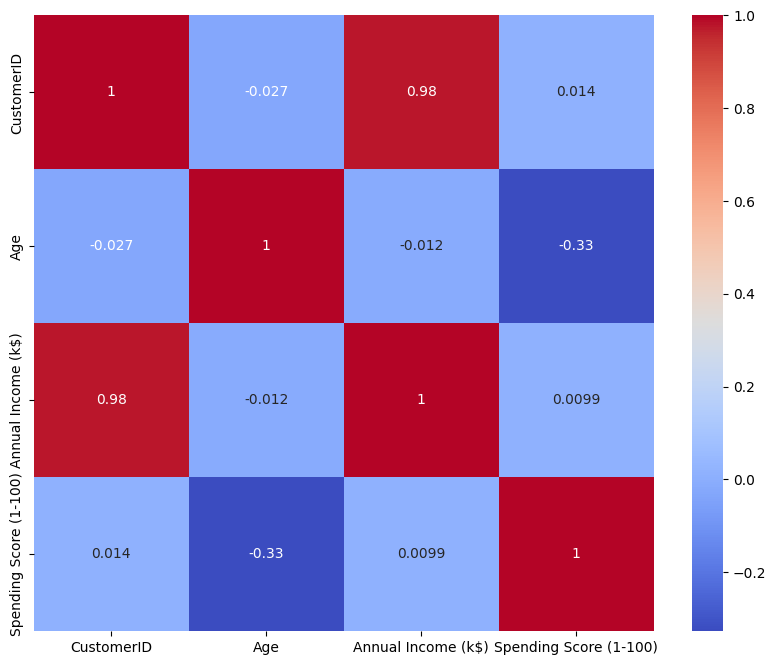

In [ ]:
# Correlação das variáveis
df_numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

## Pré-processamento de dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_preprocessing = df.copy()

- Nomalização dos dados

In [ ]:
df_preprocessing['Gender'] = df_preprocessing['Gender'].map({'Male': 0, 'Female': 1})

- Descarte de vairáveis irelevantes

In [ ]:
df_preprocessing.drop(columns='CustomerID', inplace=True)

- Remove outliers

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

#lof = LocalOutlierFactor()
#outliers = lof.fit_predict(df_preprocessing)
#df = df_preprocessing[outliers != -1]

- Normalização dos dados

In [ ]:
data_normalized = StandardScaler().fit_transform(df_preprocessing)
df_preprocessing = pd.DataFrame(data_normalized, columns=df_preprocessing.columns)

## Clusterização

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Variáveis alvo
X = df_preprocessing[['Annual Income (k$)', 'Spending Score (1-100)']]

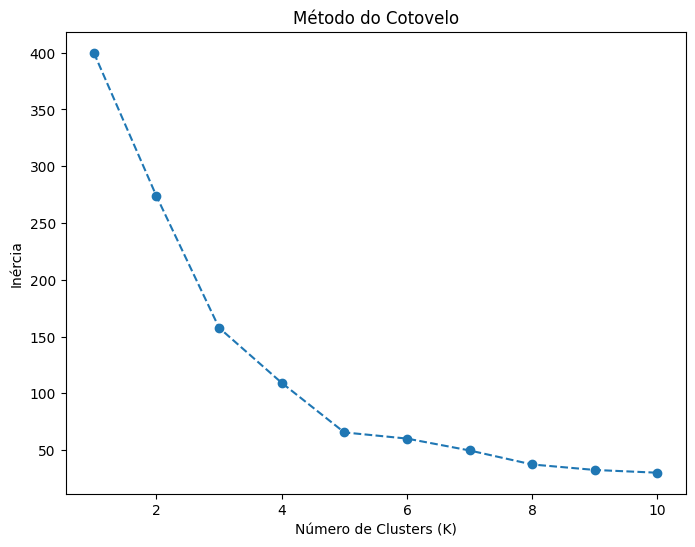

In [ ]:
# Lista para armazenar os valores de inércia para diferentes valores de K
inertia = []

# Testar valores de K de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.show()

### Aplicando o algoritmo K-means

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Definir o número de clusters
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Ajustar o modelo aos dados
k_means.fit(X)

# Obter os centróides dos clusters
centroids = k_means.cluster_centers_

# Obter as etiquetas de cada ponto
labels = k_means.labels_

# Adicionar os clusters ao DataFrame
df['cluster'] = labels

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Visualização dos resultados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

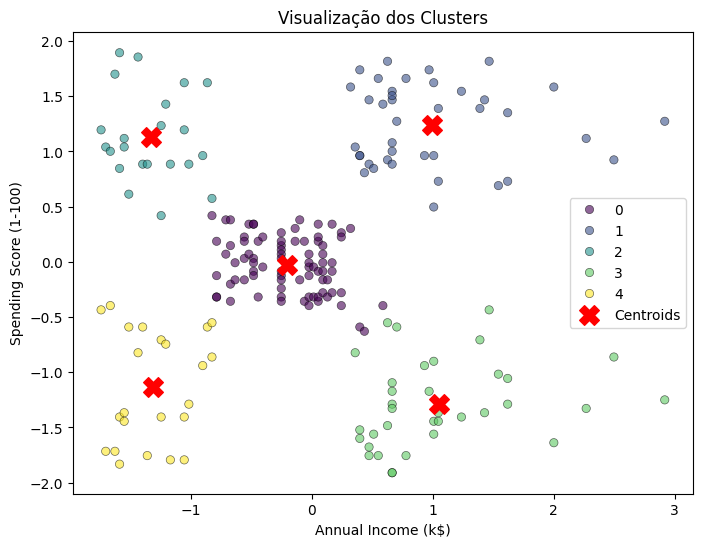

In [ ]:
# Criar a visualização do mapa 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette='viridis', alpha=0.6, edgecolor='k')

# Destacar os centróides dos clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Configurações do gráfico
plt.title("Visualização dos Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Avaliação

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calculando a pontuação média da silhueta
silhouette_avg = silhouette_score(X, labels)
print(f"Índice médio da Silhueta: {silhouette_avg:.4f}")

Índice médio da Silhueta: 0.5547
